# Notebook Nr.05
On nous demande de trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion, d'insérer une figure indiquant la dispersion par des flèches et de calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.

In [74]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter

from scipy import constants
import matplotlib.pyplot as plt
import numpy as np

## Préliminaires

In [68]:
assigned_ID = "mp-7173"
chemical_formula = "ScSbPt"

# ----------==========     Procédure de téléchargement du fichier .CIF assigné     ==========----------

with MPRester("L41ZHCirMyRASy8QHJEO") as myCristal:
    
    structure     = myCristal.get_structure_by_material_id(assigned_ID)
    bandstructure = myCristal.get_bandstructure_by_material_id(assigned_ID)

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

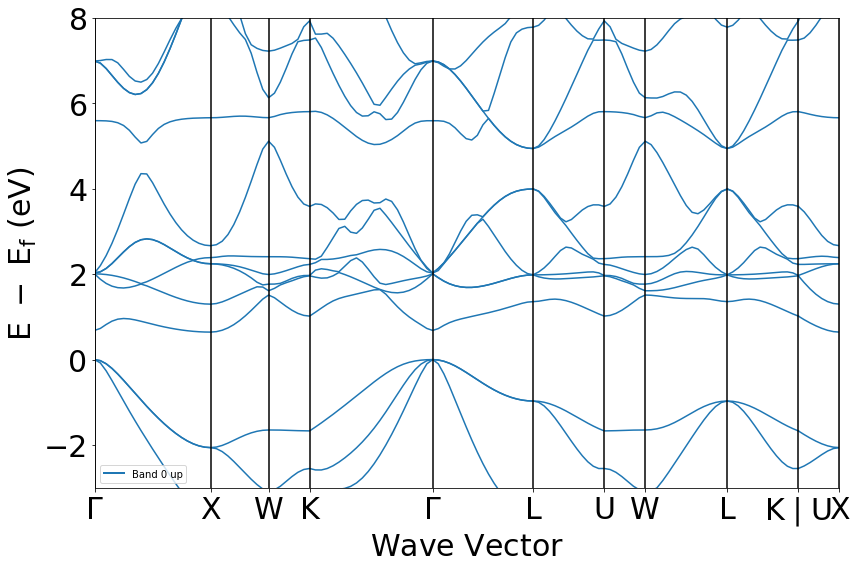

In [69]:
# ----------==========     Procédure de récupération des données de la structure de bande     ==========----------
BSP_result = BSPlotter(bandstructure)
_array_ = BSP_result.bs_plot_data(zero_to_efermi=True)
    
distances = _array_['distances']
energies  = _array_['energy']

Vband_index = bandstructure.get_vbm().get("band_index").get(list(bandstructure.get_vbm().get("band_index").keys())[0])
Cband_index = bandstructure.get_cbm().get("band_index").get(list(bandstructure.get_cbm().get("band_index").keys())[0])

BSP_result.get_plot(ylim=[-3,8])

In [70]:
# ----------==========     Bande interdite     ==========----------
Gap = bandstructure.get_band_gap()
    
print("========== Get_band_gap_value ==========\n")
print("Informations sur la bande interdite : \n")

if (Gap.get('direct') == True):
    print("Bande directe\n")
else:
    print("Bande indirecte\n")

print("Energie de gap : ",Gap.get('energy'),"\n")
print("Vecteur d'onde de transition : ",Gap.get('transition'),"\n")

========== Get_band_gap_value ==========

Informations sur la bande interdite : 

Bande indirecte

Energie de gap :  0.6432000000000002 

Vecteur d'onde de transition :  \Gamma-X 



In [71]:
# @return     : indice de la branche pour les conditions spécifiées
# @parameters : extremum = 'min' : permet d'obtenir la branche à la plus faible pente.
#                        = 'max' : permet d'obtenir la branche à la plus forte pente.
#               BandeValence = True : calculs effectués pour la bande de valence.
#                            = False : calculs effectués pour la bande de conduction.
def Dispersion(extremum,BandeValence):
    
    result = -1
    
    if(BandeValence == False):
        Z = Vband_index
    else:
        Z = Cband_index
        
    if(extremum == 'max'):
        
        Tol = -1 # Utilisé pour indiquer quand on trouve une valeur plus grande qu'une précédente.
        for z in range(0,len(Z)):
            for i in range(0,len(distances)):

                E = energies.get('1')[i][Z[z]]
                D = distances[i]
                Pente = (E[-1] - E[0]) / (D[-1] - [0])

                if (abs(Pente) > Tol):
                    Tol = Pente
                    result = i
                
        return result
    
    if(extremum == 'min'):
        
        Tol = 15 # Utilisé pour indiquer quand on trouve une valeur plus petite qu'une précédente.
        for z in range(0,len(Z)):
            for i in range(0,len(distances)):

                E = energies.get('1')[i][Z[z]]
                D = distances[i]
                Pente = (E[-1] - E[0]) / (D[-1] - [0])

                if (abs(Pente) < Tol):
                    Tol = Pente

                    result = i
        
        return result
    
# --- Normalement impossible ---
    print("Error : incorrect extremum specification !\n")
    print(extremum)
    return result

## Direction des minima et maxima de dispersion pour les bandes de valence et de conduction

#### Note de l'auteur :
Le code ci-dessous pose problème. L'erreur "AttributeError: module 'matplotlib' has no attribute 'plot' !" est une conséquence directe de l'imcompréhension de l'auteur des structures de données à manipuler (notamment le dictionnaire "energies"). De ce fait, il était assez difficile de les utiliser de manière à obtenir le résultat escompté.

AttributeError: module 'matplotlib' has no attribute 'plot'

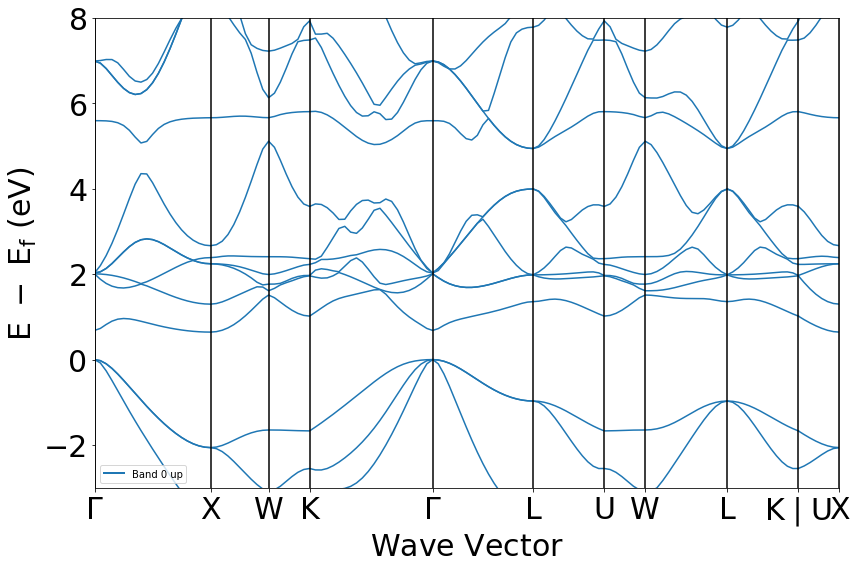

In [84]:
# ***************************************************************************************
# *                          Dispersion de la bande de valence                          *
# ***************************************************************************************

BSP_result.get_plot(ylim=[-3,8])

# ---------- Minimum ----------
    
indicesValence1 = Dispersion('min',True)
    
# Indication du point à gauche et à droite.

plt.plot([distances[indicesValence1]],energies.get('1')[indicesValence1][band_index][0],c='blue')
plt.plot([distances[indicesValence1]],energies.get('1')[indicesValence1][band_index][-1],c='blue')
    
# Coordonnées de début et de fin de la flèche.
    
x0,x1 = distances[indicesValence1][0],distances[indicesValence1][-1]
y0,y1 = energies.get('1')[indicesValence1][band_index][0],energies.get('1')[indicesValence1][band_index][-1]
    
# Ajout de la flèche à la figure.
    
plt.arrow(x1,y1,x0-x1,y0-y1,head_width=0.1,head_length=0.1,length_includes_head=True,color='blue')
    
# ---------- Maximum ----------
    
indicesValence2 = Dispersion('max',True)
    
# Indication du point à gauche et à droite.
    
plt.plot([distances[indicesValence2]],energies.get('1')[indicesValence2][band_index][0],c='red')
plt.plot([distances[indicesValence2]],energies.get('1')[indicesValence2][band_index][-1],c='red')
    
# Coordonnées de début et de fin de la flèche.
    
x0,x1 = distances[indicesValence2][0],distances[indicesValence2][-1]
y0,y1 = energies.get('1')[indicesValence2][band_index][0],energies.get('1')[indicesValence2][band_index][-1]
    
# Ajout de la flèche à la figure.
    
plt.arrow(x1,y1,x0-x1,y0-y1,head_width=0.1,head_length=0.1,length_includes_head=True,color='red')

# ***************************************************************************************
# *                          Dispersion de la bande de conduction                       *
# ***************************************************************************************

# ---------- Minimum ----------
    
indicesConduction1 = Dispersion('min',False)

# Indication du point à gauche et à droite.

plt.scatter([distances[indicesConduction1]],Energies.get('1')[indicesConduction1][band_index+1][0],c='blue')
plt.scatter([distances[indicesConduction1]],Energies.get('1')[indicesConduction1][band_index+1][-1],c='blue')

# Coordonnées de début et de fin de la flèche.

x0,x1 = distances[indicesConduction1][0],distances[indicesConduction1][-1]
y0,y1 = energies.get('1')[indicesConduction1][band_index+1][0],energies.get('1')[indicesConduction1][band_index+1][-1]

# Ajout de la flèche à la figure.

plt.arrow(x1,y1,x0-x1,y0-y1,head_width=0.1,head_length=0.1,length_includes_head=True,color='blue')
    
# ---------- Maximum ----------
    
indicesConduction2 = Dispersion('max',False)

# Indication du point à gauche et à droite.

plt.plot([distances[indicesConduction2]],energies.get('1')[indicesConduction2][band_index+1][0],c='red')
plt.plot([distances[indicesConduction2]],energies.get('1')[indicesConduction2][band_index+1][-1],c='red')

# Coordonnées de début et de fin de la flèche.

x0,x1 = distances[indicesConduction2][0],distances[indicesConduction2][-1]
y0,y1 = energies.get('1')[indicesConduction2][band_index+1][0],energies.get('1')[indicesConduction2][band_index+1][-1]

# Ajout de la flèche à la figure.

plt.arrow(x1,y1,x0-x1,y0-y1,head_width=0.1,head_length=0.1,length_includes_head=True,color='red')
    
# ---------- Affichage ----------
plt.show()

## Calcul de la masse effective

In [ ]:
# ***************************************************************************************
# *                          Calcul des masses effectives demandées                     *
# ***************************************************************************************

BSP_result.get_plot()
    
# ----- Pour le maximum de bande de valence -----
    
E_maxV = energies.get('1')[indicesValence2][band_index]
D_maxV = distances[indicesValence2]
    
CoefPoly_maxV = polyfit(D_maxV,E_maxV,2) # coefficients de la parabole.

xPlot_maxV = linspace(D_maxV - 1.,E_maxV + 1., 1000) # input parabole.
yPlot_maxV = polyval(CoefPoly_maxV,xPlot_maxV) # output parabole.
    
# ----- Pour le minimum de bande de conduction -----
    
E_minC = energies.get('1')[indicesConduction1][band_index+1]
D_minC = distances[indicesConduction1]
    
CoefPoly_minC = polyfit(D_minC,E_minC,2) # coefficients de la parabole.

xPlot_minC = linspace(D_maxV - 0.5,E_maxV + 1., 1000) # input parabole.
yPlot_minC = polyval(CoefPoly_minC,xPlot_minC) # output parabole.
    
# ----- Calculs -----
    
h = constants.hbar # constante de Planck / 2pi
a = 1.602e-19 # angstrom
    
masseEffective_vide       = 9.109e-31 # Masse effective de l'électron dans le vide

masseEffective_valence    = (h**2) / (2*CoefPoly_maxV[0]) / (1e-20 * a)

masseEffective_conduction = (h**2) / (2*CoefPoly_minC[0]) / (1e-20 * a)
    
# ----- Affichage -----
    
print("===== Rapport des masses effectives avec la masse de l'électron dans le vide =====\n")
print(" Bande de valence : ", masseEffective_valence/masseEffective_vide,"\n")
print("Bande de conduction :", masseEffective_conduction/masseEffective_vide,"\n")
    
plt.plot(xPlot_maxV,yPlot_maxV,'-b')
plt.plot(xPlot_minC,yPlot_minC,'-r')
plt.show()